Text(0.3, 0.3, '한글')

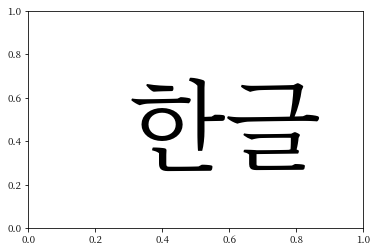

In [1]:
# 한글글꼴 경로 확인
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

import matplotlib
import matplotlib.pyplot as plt

# 근데 우분투 한글 기본 글꼴이 이거였어???
path = '/usr/share/fonts/opentype/noto/NotoSerifCJK-Regular.ttc'
font_name = fm.FontProperties(fname=path).get_name()
matplotlib.rc('font', family=font_name)
plt.text(0.3, 0.3, '한글', size=100)

# import sklearn

# #나눔 폰트를 사용합니다.
# matplotlib.rc('font', family='NotoSerifCJK-Regular')
# matplotlib.rcParams['axes.unicode_minus'] = False

# # imshow 함수로 흑백 이미지를 출력하기 위해
# plt.rcParams['image.cmap'] = "gray"
# plt.text(0.3, 0.3, '한글', size=100)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [3]:
import os
data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# 예제를 위해 몇개의 열만 선택합니다
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [4]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [5]:
print("원본특성:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 이후 특성:\n", list(data_dummies.columns))

원본특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 이후 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ O

In [6]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# 중요 pd에서 열 인덱싱은 numpy 배열의 인덱싱과 달리 index의 마지막 범위를 포함한다.

X = features.values
y = data_dummies['income_ >50K'].values # imcome_ <=50K는 안 쓰는겨?
print("X.shape:{} y.shape:{}".format(X.shape, y.shape))

X.shape:(32561, 44) y.shape:(32561,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
print("테스트점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트점수: 0.81


/home/supreme/anaconda3/envs/imlp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
demo_df = pd.DataFrame({'숫자특성':[0, 1, 2, 1], '범주형특성':['양말', '여우', '양말', '상자']})
demo_df

,숫자특성,범주형특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [10]:
pd.get_dummies(demo_df)

,숫자특성,범주형특성_상자,범주형특성_양말,범주형특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [11]:
demo_df['숫자특성'] = demo_df['숫자특성'].astype(str)
pd.get_dummies(demo_df, columns=['숫자특성', '범주형특성'])

,숫자특성_0,숫자특성_1,숫자특성_2,범주형특성_상자,범주형특성_양말,범주형특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


/home/supreme/anaconda3/envs/imlp/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
print(ohe.get_feature_names_out())

['숫자특성_0' '숫자특성_1' '숫자특성_2' '범주형특성_상자' '범주형특성_양말' '범주형특성_여우']


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
    ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data_features = data.drop("income", axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state=0)
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


/home/supreme/anaconda3/envs/imlp/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)
X_test_trans = ct.transform(X_test)
print("테스트점수:{:.2f}".format(logreg.score(X_test_trans, y_test)))

테스트점수:0.81


(120, 1)

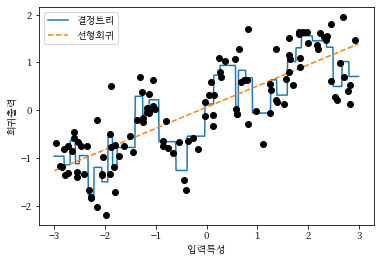

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1) # line.shape (1000, 1) 그니까 결국 interpolation이지 머...
reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="결정트리")
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="선형회귀")
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel('회귀출력')
plt.xlabel('입력특성')
plt.legend(loc='best')
X.shape # (120, 1)

In [18]:
from sklearn.preprocessing import KBinsDiscretizer
kb=KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]


In [19]:
X_binned = kb.transform(X)
X_binned
X_binned.shape

(120, 10)

In [20]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [21]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)
print(X[:10])
X_binned[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

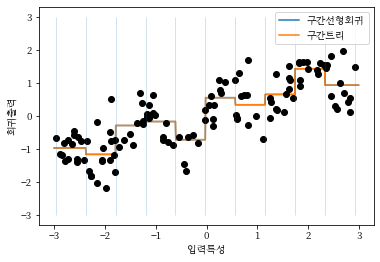

In [22]:
line_binned = kb.transform(line)
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간선형회귀')

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="구간트리")
plt.plot(X[:,0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2) #이거 세로로 긋는 퍼런 선

plt.ylabel('회귀출력')
plt.xlabel('입력특성')
plt.legend(loc='best')

# 같은 예측을 만들어내기 때문에 완전히 겹침!

In [23]:
X_combined = np.hstack([X, X_binned])
# X는 (120, 1)
# X_binned는 (120, 10)
print(X_combined.shape) # 얘는 (120, 11)

(120, 11)


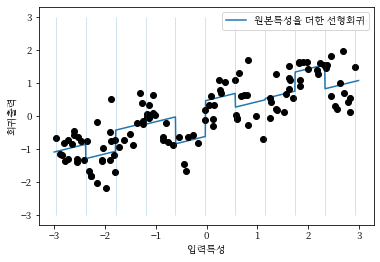

In [24]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='원본특성을 더한 선형회귀')

plt.plot(X[:,0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2) #이거 세로로 긋는 퍼런 선

plt.ylabel('회귀출력')
plt.xlabel('입력특성')
plt.legend(loc='best')

In [25]:
X_product = np.hstack([X_binned, X * X_binned]) # 구간 안에서는 원본 특성이고 다른 곳에서는 0이다?
print(X_product.shape)

(120, 20)


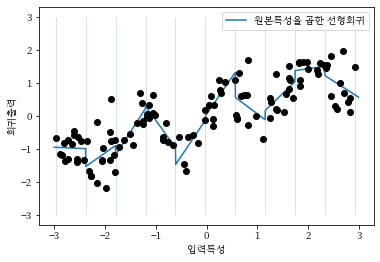

In [26]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='원본특성을 곱한 선형회귀')
plt.plot(X[:,0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2) #이거 세로로 긋는 퍼런 선

plt.ylabel('회귀출력')
plt.xlabel('입력특성')
plt.legend(loc='best')

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
print("X_poly.shape", X_poly.shape)

X_poly.shape (120, 10)


In [28]:
print("X원소\n", X[:5])
print("X_poly원소\n", X_poly[:5])

X원소
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly원소
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [29]:
print("항 이름:\n", poly.get_feature_names_out())

항 이름:
 ['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


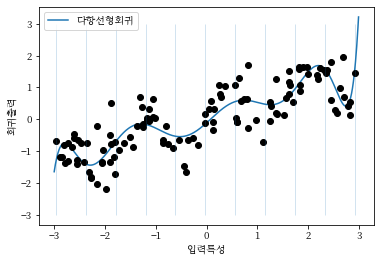

In [30]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label="다항선형회귀")
plt.plot(X[:,0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2) #이거 세로로 긋는 퍼런 선

plt.ylabel('회귀출력')
plt.xlabel('입력특성')
plt.legend(loc='best')

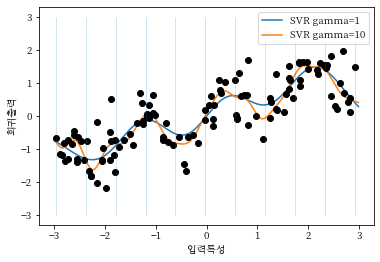

In [31]:
from sklearn.svm import SVR
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label="SVR gamma={}".format(gamma))

plt.plot(X[:,0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2) #이거 세로로 긋는 퍼런 선

plt.ylabel('회귀출력')
plt.xlabel('입력특성')
plt.legend(loc='best')

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# boston 이렇게 사용할 수 있음!!!
# 보스턴 주택 데이터셋이 1.2 버전에서 삭제되므로 직접 다운로드합니다.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape:", X_train.shape)
print("X_train_poly.shape:", X_train_poly.shape)

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [34]:
print("다항 특성 이름\n", poly.get_feature_names_out())

다항 특성 이름
 ['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12'
 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x0 x8'
 'x0 x9' 'x0 x10' 'x0 x11' 'x0 x12' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5'
 'x1 x6' 'x1 x7' 'x1 x8' 'x1 x9' 'x1 x10' 'x1 x11' 'x1 x12' 'x2^2' 'x2 x3'
 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7' 'x2 x8' 'x2 x9' 'x2 x10' 'x2 x11'
 'x2 x12' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x3 x8' 'x3 x9' 'x3 x10'
 'x3 x11' 'x3 x12' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7' 'x4 x8' 'x4 x9' 'x4 x10'
 'x4 x11' 'x4 x12' 'x5^2' 'x5 x6' 'x5 x7' 'x5 x8' 'x5 x9' 'x5 x10'
 'x5 x11' 'x5 x12' 'x6^2' 'x6 x7' 'x6 x8' 'x6 x9' 'x6 x10' 'x6 x11'
 'x6 x12' 'x7^2' 'x7 x8' 'x7 x9' 'x7 x10' 'x7 x11' 'x7 x12' 'x8^2' 'x8 x9'
 'x8 x10' 'x8 x11' 'x8 x12' 'x9^2' 'x9 x10' 'x9 x11' 'x9 x12' 'x10^2'
 'x10 x11' 'x10 x12' 'x11^2' 'x11 x12' 'x12^2']


In [35]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))


상호작용이 없을 때 점수: 0.621
상호작용이 있을 때 점수: 0.753


In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.775


In [37]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

# print(X_org)
# [[ 1.76405235  0.40015721  0.97873798]
#  [ 2.2408932   1.86755799 -0.97727788]
#  [ 0.95008842 -0.15135721 -0.10321885]
#  ...

# print(w)
# [ 1.59327362  0.5687224  -0.11448705]

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

# print(X)
# [[56 18 27]
#  [81 57  3]
#  [25  9 11]
#  ...

# print(y)
# [ 2.92614361e+00  4.74436373e+00  1.43948780e+00  5.69621088e-01
#   1.23092405e+00  1.40483870e+00  3.05343393e-01  1.61798577e+00
#   2.78397106e+00  4.05268238e-01  5.63583108e-01 -3.37171612e+00
#  ...

# print(y.shape)
# (1000,)

print(X[:10, 0])
X[0,0]

[ 56  81  25  20  27  18  12  21 109   7]


56

In [38]:
print("특성 출현 횟수:\n", np.bincount(X[:,0]))
# 특성 출현 횟수:
#  [28 38 68 48 61 59

# 나는 이 결과가 
# X[0, 0]인 56의 count 28, X[1,0]인 81의 count 38 뭐 그렇게 이해했는데
# 0이 28, 1이 38, 2가 68 뭐 이렇다는데?

특성 출현 횟수:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, '값')

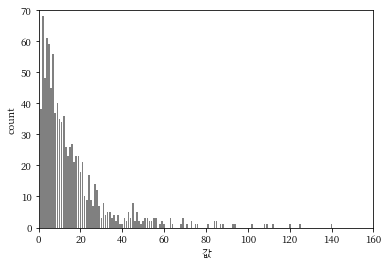

In [39]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:,0])
#print(range(len(bins))) # 뭐 걍 0부터 140까지?
plt.bar(range(len(bins)), bins, color='gray')
plt.ylabel("count")
plt.xlabel("값")

In [40]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수:{:.3f}".format(score))

테스트 점수:0.622


Text(0.5, 0, '값')

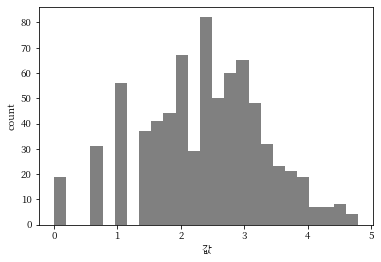

In [41]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)
plt.hist(X_train_log[:,0], bins=25, color="gray")
plt.ylabel("count")
plt.xlabel("값")

In [42]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트점수 {:.3f}".format(score))

테스트점수 0.875


In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
# print(cancer.data.shape) # (569, 30)
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50)) # 50개의 noise 추가
# print(noise)
X_w_noise = np.hstack([cancer.data, noise])
# print(X_w_noise.shape) # (569, 80)

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

select = SelectPercentile(score_func=f_classif, percentile=50) # f_classif를 사용하여 특성의 50% 선택
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
print("X_train.shape", X_train.shape)
print("X_train_selected.shape", X_train_selected.shape)
# X_train.shape (284, 80)
# X_train_selected.shape (284, 40)

X_train.shape (284, 80)
X_train_selected.shape (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x7ff3f54e0670>], [Text(0, 0, '0')])

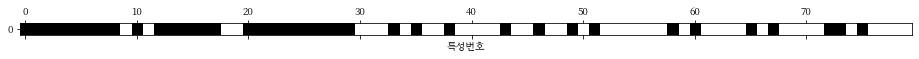

In [44]:
mask = select.get_support() # 선택된 특성을 불리언 값으로 표시
print(mask)

plt.matshow(mask.reshape(1, -1), cmap="gray_r") # true 검정, false 흰색
plt.xlabel("특성번호")
plt.yticks([0])

In [45]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("일부 선택된 특성을 사용한 점수: {:.3f}".format(lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.951
일부 선택된 특성을 사용한 점수: 0.933


In [46]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

In [47]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: ", X_train.shape)
print("X_train_l1.shape: ", X_train_l1.shape)

X_train.shape:  (284, 80)
X_train_l1.shape:  (284, 40)


([<matplotlib.axis.YTick at 0x7ff3f546e790>], [Text(0, 0, '0')])

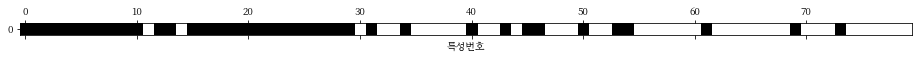

In [48]:
mask = select.get_support() # 선택된 특성을 불리언 값으로 표시
# print(mask)

plt.matshow(mask.reshape(1, -1), cmap="gray_r") # true 검정, false 흰색
plt.xlabel("특성번호")
plt.yticks([0])

In [49]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.947


Text(0.5, 0, '특성번호')

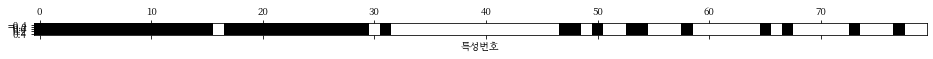

In [50]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40) # RFE는 특성이 누락될 때마다 다시 학습, 여기서는 40번 실행됨
select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성번호")

In [51]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.940


In [52]:
print("테스트 점수: {:.3f}".format(select.score(X_test, y_test)))

테스트 점수: 0.951


In [53]:
citibike = mglearn.datasets.load_citibike()
print("시티바이크 데이터:\n", citibike.head())

시티바이크 데이터:
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


/home/supreme/imlp/mglearn/datasets.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_resampled = data_starttime.resample("3h").sum().fillna(0)


DatetimeIndex(['2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
               '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
               '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
               '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
               '2015-08-29', '2015-08-30', '2015-08-31'],
              dtype='datetime64[ns]', freq='D')


Text(0, 0.5, '대여횟수')

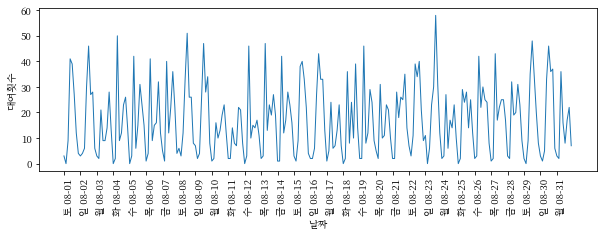

In [57]:
plt.figure(figsize=(10,3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
print(xticks)
week = ["일", "월", "화", "수", "목", "금", "토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"), xticks.strftime(" %m-%d"))]
# xticks_name = [w+d for w, d in zip(xticks.strftime("%w"), xticks.strftime(" %m-%d"))]

plt.xticks(xticks, xticks_name, rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")

In [64]:
y = citibike.values
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10 ** 9 # POSIX 시간을 10**9로 나누어 변환 => 이게 대체 뭔 소리여?
# print(X)

In [82]:
n_train = 184

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10,3))
    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left") # 3시간씩 누적한 카운트이므로 하루치는 24/3 = 8개씩
    plt.plot(range(n_train), y_train, label="훈련")
#     plt.plot(range(n_train, len(y_test)+n_train), y_test, '-', label="테스트")
    plt.plot(range(n_train, len(y_test)+n_train), y_test, label="테스트") # '-'는 있으나 없으나 마찬가지 같은데?
    plt.plot(range(n_train), y_pred_train, '--', label="훈련 예측")
    plt.plot(range(n_train, len(y_test)+n_train), y_pred, '--', label="테스트 예측") # 근데 얘는 아무것도 학습되지 않은거야?????
    plt.legend(loc=(1.01, 0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")

테스트 세트 R^2: -0.04


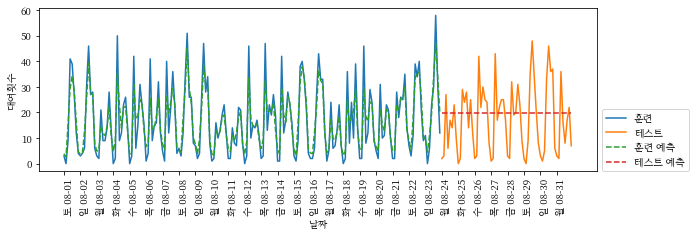

In [83]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

테스트 세트 R^2: 0.60


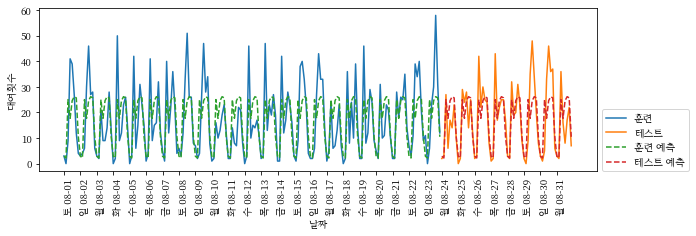

In [87]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
# print(citibike.index)
eval_on_features(X_hour, y, regressor)

Int64Index([5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
            ...
            6, 6, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='starttime', length=248)
테스트 세트 R^2: 0.84


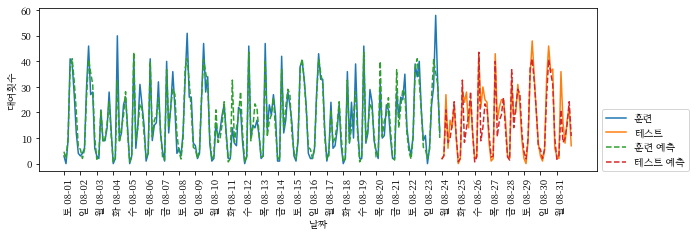

In [89]:
# print(citibike.index.dayofweek)
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1), citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

테스트 세트 R^2: 0.13


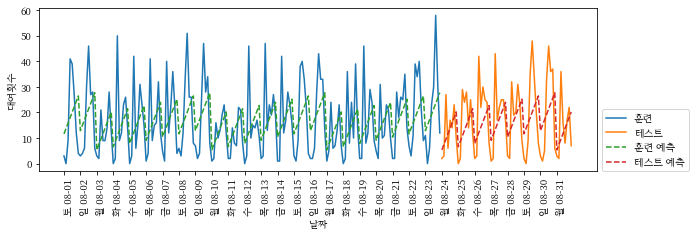

In [90]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

테스트 세트 R^2: 0.62


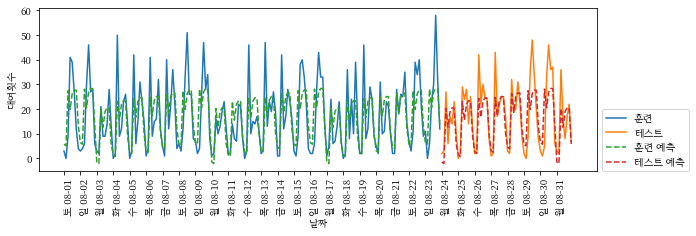

In [92]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge())

테스트 세트 R^2: 0.85


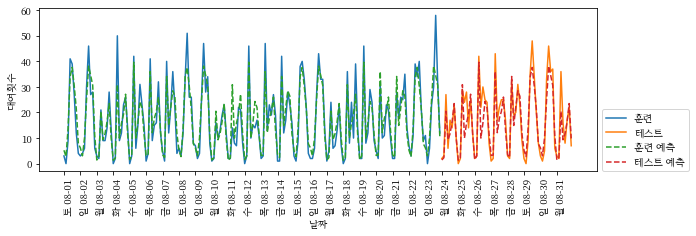

In [93]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [96]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["월", "화", "수", "목", "금", "토", "일"]
features=day+hour

print(features)

['월', '화', '수', '목', '금', '토', '일', '00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00']


In [97]:
features_poly = poly_transformer.get_feature_names_out(features)
features_nonzero = np.array(features_poly[lr.coef_ != 0])
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, '계수의 크기')

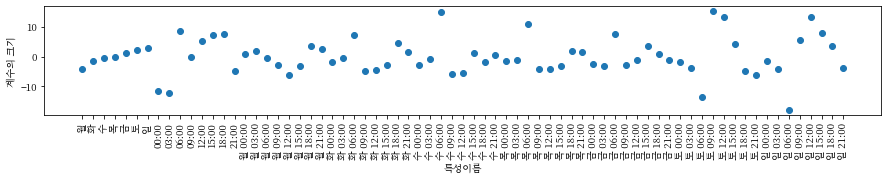

In [99]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성이름")
plt.ylabel("계수의 크기")